# Limpeza de dados

Bibliotecas importadas

In [18]:
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib.ticker import StrMethodFormatter
plt.style.use('ggplot')

Carregamento dos dados de temperatura diária máxima (`TMAX`), temperatura diária mínima (`TMIN`) e temperatura diária média (`TAVG`) para o aeroporto LaGuardia na cidade de Nova York para o mês de Outubro de 2018.

In [3]:
df = pd.read_csv('/workspace/hands-on-data-analysis/sec-01/03-data-wrangling-with-pandas/data/nyc_temperatures.csv')
df.head()

,date,datatype,station,attributes,value
0,2018-10-01T00:00:00,TAVG,GHCND:USW00014732,"H,,S,",21.2
1,2018-10-01T00:00:00,TMAX,GHCND:USW00014732,",,W,2400",25.6
2,2018-10-01T00:00:00,TMIN,GHCND:USW00014732,",,W,2400",18.3
3,2018-10-02T00:00:00,TAVG,GHCND:USW00014732,"H,,S,",22.7
4,2018-10-02T00:00:00,TMAX,GHCND:USW00014732,",,W,2400",26.1


Antes de iniciar o processo de limpeza de dados propriamente dito, verificamos os nomes das colunas do _dataframe_ `df` e utilizamos o método `rename` da biblioteca `pandas` para atribuir nomes mais descritivos das colunas.

In [4]:
df.columns

Index(['date', 'datatype', 'station', 'attributes', 'value'], dtype='object')

In [5]:
df.rename(
    columns={'value': 'temp_C', 'attributes': 'flags'},
    inplace=True
)

In [6]:
df.columns

Index(['date', 'datatype', 'station', 'flags', 'temp_C'], dtype='object')

Após alterar os nomes das colunas para que sejam mais indicativos de seu conteúdo, efetuamos a checagem de quais tipos de dados estão contidos em cada coluna.

In [8]:
df.dtypes

date         object
datatype     object
station      object
flags        object
temp_C      float64
dtype: object

Vamos converter os dados da coluna `date` do tipo geral `object` para o tipo `datetime`.

In [9]:
df.loc[:, 'date'] = pd.to_datetime(df.date)
df.dtypes

date        datetime64[ns]
datatype            object
station             object
flags               object
temp_C             float64
dtype: object

Com essa alteração de tipo, podemos obter informações mais úteis acerca da variável `date`:

In [10]:
df['date'].describe(datetime_is_numeric=True)

count                     93
mean     2018-10-16 00:00:00
min      2018-10-01 00:00:00
25%      2018-10-08 00:00:00
50%      2018-10-16 00:00:00
75%      2018-10-24 00:00:00
max      2018-10-31 00:00:00
Name: date, dtype: object

In [11]:
df = df.assign(
    date = lambda x: pd.to_datetime(x.date),
    temp_C_whole = lambda x: x.temp_C.astype('int'),
    temp_F = lambda x: (x.temp_C * 9/5) + 32,
    temp_F_whole = lambda x: x.temp_F.astype('int')
)

df.head()

,date,datatype,station,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
0,2018-10-01,TAVG,GHCND:USW00014732,"H,,S,",21.2,21,70.16,70
1,2018-10-01,TMAX,GHCND:USW00014732,",,W,2400",25.6,25,78.08,78
2,2018-10-01,TMIN,GHCND:USW00014732,",,W,2400",18.3,18,64.94,64
3,2018-10-02,TAVG,GHCND:USW00014732,"H,,S,",22.7,22,72.86,72
4,2018-10-02,TMAX,GHCND:USW00014732,",,W,2400",26.1,26,78.98,78


In [13]:
df[df.datatype == 'TMAX']\
    .sort_values(by='temp_C', ascending=False).head(10)

,date,datatype,station,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
19,2018-10-07,TMAX,GHCND:USW00014732,",,W,2400",27.8,27,82.04,82
28,2018-10-10,TMAX,GHCND:USW00014732,",,W,2400",27.8,27,82.04,82
31,2018-10-11,TMAX,GHCND:USW00014732,",,W,2400",26.7,26,80.06,80
10,2018-10-04,TMAX,GHCND:USW00014732,",,W,2400",26.1,26,78.98,78
4,2018-10-02,TMAX,GHCND:USW00014732,",,W,2400",26.1,26,78.98,78
1,2018-10-01,TMAX,GHCND:USW00014732,",,W,2400",25.6,25,78.08,78
25,2018-10-09,TMAX,GHCND:USW00014732,",,W,2400",25.6,25,78.08,78
7,2018-10-03,TMAX,GHCND:USW00014732,",,W,2400",25.0,25,77.00,77
13,2018-10-05,TMAX,GHCND:USW00014732,",,W,2400",22.8,22,73.04,73
22,2018-10-08,TMAX,GHCND:USW00014732,",,W,2400",22.8,22,73.04,73


In [15]:
df[df['datatype'] == 'TMAX'].sort_values(
    by=['temp_C_whole', 'date'], ascending=[False, True]
).head(10)

,date,datatype,station,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
19,2018-10-07,TMAX,GHCND:USW00014732,",,W,2400",27.8,27,82.04,82
28,2018-10-10,TMAX,GHCND:USW00014732,",,W,2400",27.8,27,82.04,82
4,2018-10-02,TMAX,GHCND:USW00014732,",,W,2400",26.1,26,78.98,78
10,2018-10-04,TMAX,GHCND:USW00014732,",,W,2400",26.1,26,78.98,78
31,2018-10-11,TMAX,GHCND:USW00014732,",,W,2400",26.7,26,80.06,80
1,2018-10-01,TMAX,GHCND:USW00014732,",,W,2400",25.6,25,78.08,78
7,2018-10-03,TMAX,GHCND:USW00014732,",,W,2400",25.0,25,77.00,77
25,2018-10-09,TMAX,GHCND:USW00014732,",,W,2400",25.6,25,78.08,78
13,2018-10-05,TMAX,GHCND:USW00014732,",,W,2400",22.8,22,73.04,73
22,2018-10-08,TMAX,GHCND:USW00014732,",,W,2400",22.8,22,73.04,73


In [16]:
sp = pd.read_csv(
    '/workspace/hands-on-data-analysis/sec-01/03-data-wrangling-with-pandas/data/sp500.csv',
    index_col='date', parse_dates=True
).drop(columns=['adj_close'])

In [17]:
sp.head(10).assign(day_of_week=lambda x: x.index.day_name())

,high,low,open,close,volume,day_of_week
date,,,,,,
2017-01-03,2263.879883,2245.129883,2251.570068,2257.830078,3770530000,Tuesday
2017-01-04,2272.820068,2261.600098,2261.600098,2270.750000,3764890000,Wednesday
2017-01-05,2271.500000,2260.449951,2268.179932,2269.000000,3761820000,Thursday
2017-01-06,2282.100098,2264.060059,2271.139893,2276.979980,3339890000,Friday
2017-01-09,2275.489990,2268.899902,2273.590088,2268.899902,3217610000,Monday
2017-01-10,2279.270020,2265.270020,2269.719971,2268.899902,3638790000,Tuesday
2017-01-11,2275.320068,2260.830078,2268.600098,2275.320068,3620410000,Wednesday
2017-01-12,2271.780029,2254.250000,2271.139893,2270.439941,3462130000,Thursday
2017-01-13,2278.679932,2271.510010,2272.739990,2274.639893,3081270000,Friday


In [19]:
bitcoin = pd.read_csv(
    '/workspace/hands-on-data-analysis/sec-01/03-data-wrangling-with-pandas/data/bitcoin.csv',
    index_col='date', parse_dates=True
).drop(columns=['market_cap'])

In [20]:
portfolio = pd.concat([sp, bitcoin], sort=False).groupby(level='date').sum()

In [21]:
portfolio.head(10).assign(
    day_of_week=lambda x: x.index.day_name()
)

,high,low,open,close,volume,day_of_week
date,,,,,,
2017-01-01,1003.080000,958.700000,963.660000,998.330000,147775008,Sunday
2017-01-02,1031.390000,996.700000,998.620000,1021.750000,222184992,Monday
2017-01-03,3307.959883,3266.729883,3273.170068,3301.670078,3955698000,Tuesday
2017-01-04,3432.240068,3306.000098,3306.000098,3425.480000,4109835984,Wednesday
2017-01-05,3462.600000,3170.869951,3424.909932,3282.380000,4272019008,Thursday
2017-01-06,3328.910098,3148.000059,3285.379893,3179.179980,3691766000,Friday
2017-01-07,908.590000,823.560000,903.490000,908.590000,279550016,Saturday
2017-01-08,942.720000,887.250000,908.170000,911.200000,158715008,Sunday
2017-01-09,3189.179990,3148.709902,3186.830088,3171.729902,3359486992,Monday


Visualização de dados

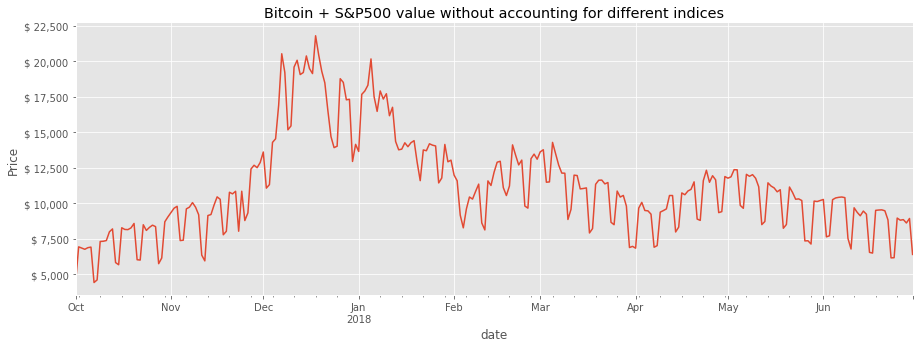

In [24]:
ax = portfolio['2017-Q4':'2018-Q2'].plot(
    y='close', figsize=(15,5), legend=False,
    title='Bitcoin + S&P500 value without accounting for different indices'
)

ax.set_ylabel('Price')
ax.yaxis.set_major_formatter(StrMethodFormatter('$ {x:,.0f}'))

for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

plt.show()